In [20]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [21]:
from helper import load_data, normalize_data

data = load_data()
(N, d) = data.shape
print("Number of data points: ", N)
print("Dimension of each data point: ", d)

Number of data points:  272
Dimension of each data point:  2


### Initialize your cluster centers

In [22]:
import numpy as np

def initialize_clusters(data, k):
    """randomly initialize the k cluster centers (the means). Make sure you choose k clusters from the data itself,
             or ensure otherwise that your initializations have the same scale as the data

    Args:
        data: shape = (N, d). original data.
        k: integer number. predefined number of clusters for the k-means algorithm.
    Returns:
        numpy array with shape (k, d) which corresponds to the k initial clusters.
    """
    # Randomly select k data points from the given data
    cluster_indices = np.random.choice(data.shape[0], k, replace=False)
    # Initialize the cluster centers using the selected data points
    clusters = data[cluster_indices]
    return clusters
    

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [23]:
def build_distance_matrix(data, mu):
    """builds a distance matrix.

    Args:
        data: numpy array of shape = (N, d). original data.
        mu:   numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        numpy array of shape (N, k):
            squared distances matrix,
            the value row i column j corresponds to the squared distance of datapoint i with cluster center j.
    """
    # Compute the squared distances between each data point and each cluster center
    distance_matrix = np.zeros((data.shape[0], mu.shape[0]))
    print(mu.shape[0])
    for i in range(data.shape[0]):
        for k in range(mu.shape[0]):
            
            #compute the squared euclidean distance between data point i and cluster center j
            distance_matrix[i, k] = np.sum((data[i, :] - mu[k, :])**2)
    
    return distance_matrix

#### Update k-means parameters

In [24]:
def update_kmeans_parameters(data, mu_old):
    """compute one step of the kmeans algorithm: using mu_old, find to which cluster each datapoint belongs to,
            then update the parameter cluster centers.

    Args:
        data:   numpy array of shape = (N, d). original data.
        mu_old: numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        losses: shape (N, ), contains the (old) squared distances of each data point to its (old) cluster mean (computed from mu_old).
        assignments: vector of shape (N, ) which contains the cluster associated to each data point.
        mu: updated vector mu of shape (k, d) where each row corresponds to the new cluster center.
    """
    
    # Compute the distance matrix
    distance_matrix = build_distance_matrix(data, mu_old)
    assignments = np.argmin(distance_matrix, axis=1) # go over all columns and find the index of the minimum value
    losses = np.min(distance_matrix, axis=1) # go over all columns and find the minimum value

    # Update the cluster centers
    mu = np.zeros(mu_old.shape)
    for j in range(mu_old.shape[0]):
        mu[j, :] = np.mean(data[assignments == j, :], axis=0)

    return losses, assignments, mu

#### Play with k-means

2
The current iteration of k-means is: 0,                    the average loss is 52.166592283088235.
2
2


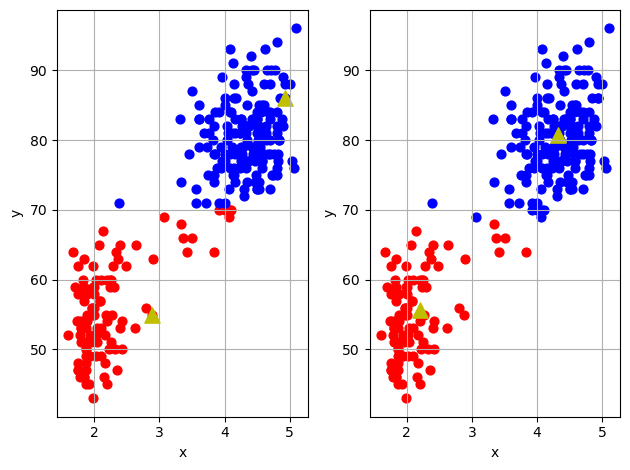

2
The current iteration of k-means is: 1,                    the average loss is 33.16424094596259.
2
2


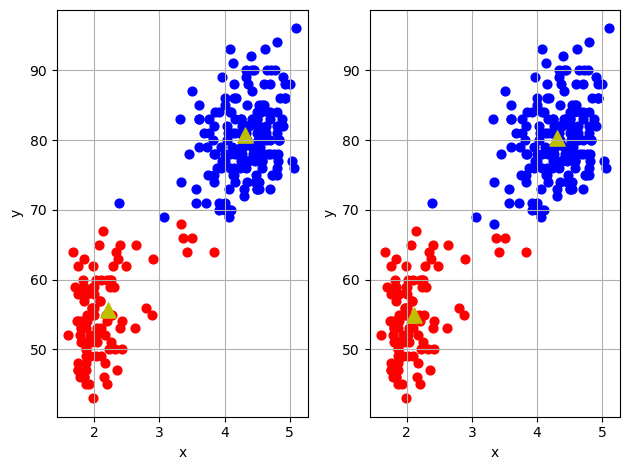

2
The current iteration of k-means is: 2,                    the average loss is 32.73675733630585.
2
2


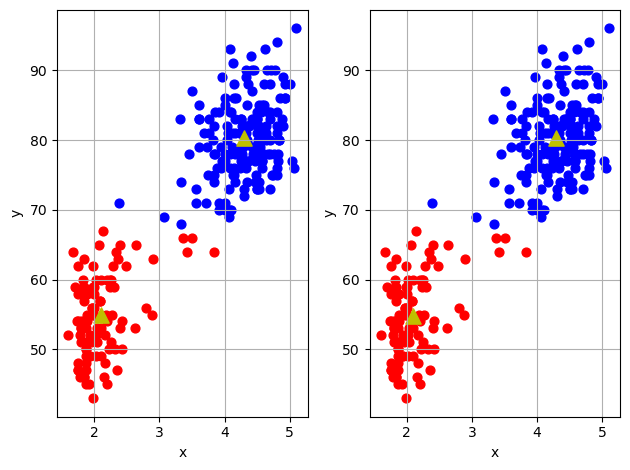

2
The current iteration of k-means is: 3,                    the average loss is 32.72709088583533.
2
2


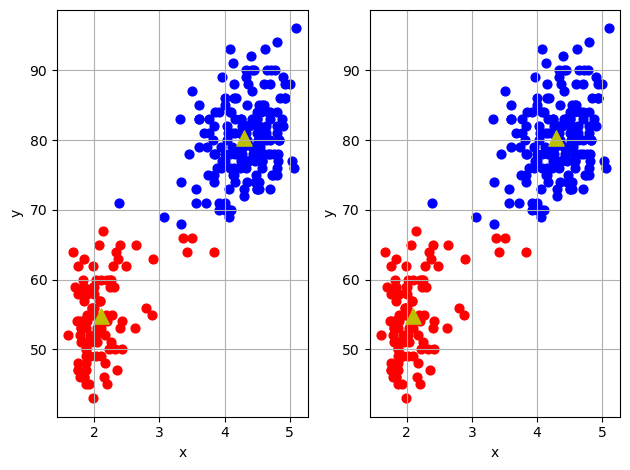

2
The current iteration of k-means is: 4,                    the average loss is 32.72709088583533.


In [25]:
from helper import build_dir
from plots import plot


def kmeans(data, k, max_iters, threshold, verbose=True):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iteration in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        if verbose:
            print(
                "The current iteration of k-means is: {i}, \
                   the average loss is {l}.".format(
                    i=iteration, l=average_loss
                )
            )
        # check convergence
        if iteration > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        if verbose:
            plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iteration))
        # update k-means information.
        mu_old = mu
    return average_loss


# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
average_loss = kmeans(data, k, max_iters, threshold)

### Plotting the loss as a function of number of clusters

2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
12
12
12
12
12
12
13
13
13
13
13
13
13
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16


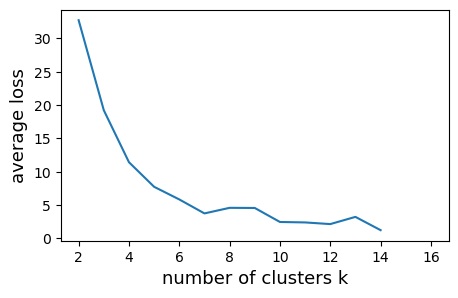

In [26]:
# don't worry about empty slice warnings
import warnings

warnings.filterwarnings("ignore")

losses = []
ks = np.arange(2, 17)
for k in ks:
    average_loss = kmeans(data, k, max_iters, threshold, verbose=False)
    losses += [average_loss]
plt.figure(figsize=(5, 3))
plt.xlabel("number of clusters k", fontsize=13)
plt.ylabel("average loss", fontsize=13)
plt.plot(ks, losses)
plt.show()

## Using k-means for image compresson

#### load image

In [27]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype
    )
)

Original image: the shape of image=(480, 480, 3), the data type=float32.


#### preprocess image

In [30]:
def preprocess_image(original_image):
    """preprocess the image.
    vectorize the three matrices (each matrix corresponds to a RGB color channel). **don't normalize!**

    Args:
        original_image: numpy array of shape (480, 480, 3)
    Returns:
        processed_image: numpy array of shape (480*480, 3)
    """
    processed_image = np.reshape(original_image, (original_image.shape[0]*original_image.shape[1], 3))
    return processed_image


processed_image = preprocess_image(original_image)

5
5
5
5
5


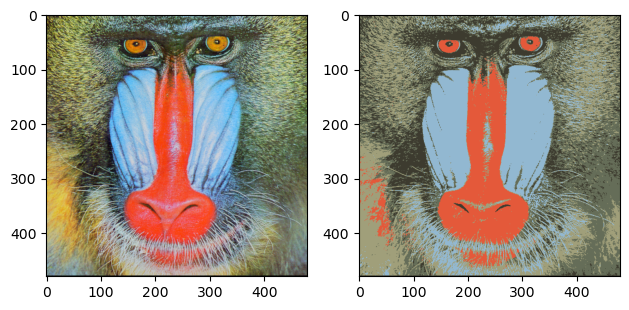

In [33]:
from plots import plot_image_compression


def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression.
    Args:
        original_image: numpy array of shape (480, 480, 3).
        processed_image: numpy array of shape (480*480, 3).
        k: scalar. Number of clusters.
        max_iters: integer. Max number of iterations for the kmeans algorithm.
        threshold: scalar. Stop the kmeans algorithm if the loss decrease between two iterations
                        is lower than the threshold.
    """
    # Initialize cluster centers
    mu_old = initialize_clusters(processed_image, k)
    
    # Start the k-means algorithm
    for iteration in range(max_iters):
        # Update z and mu
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        
        # Calculate the average loss over all points
        average_loss = np.mean(losses)
        
        # Check convergence
        if iteration > 0 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
        
        # Update mu_old
        mu_old = mu
    
    """ # Plot the reconstructed image
    reconstructed_image = np.zeros_like(original_image)
    for i in range(processed_image.shape[0]):
        cluster_index = assignments[i]
        reconstructed_image[i // original_image.shape[1], i % original_image.shape[1]] = mu[cluster_index]
    
    plt.imshow(reconstructed_image)
    plt.axis('off')
    plt.show() """

    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)


# define parameters
k = 5
max_iter = 5
threshold = 1e-7

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)